# Phenotype Phase Plane

Phenotype phase planes will show distinct phases of optimal growth with different use of two different substrates. For more information, see [Edwards et al.](http://dx.doi.org/10.1002/bit.10047)

Cobrapy supports calculating and plotting (using [matplotlib](http://matplotlib.org)) these phenotype phase planes. Here, we will make one for the "textbook" _E. coli_ core model.

In [1]:
%matplotlib inline
from time import time


import cobra.test
from cobra.flux_analysis import calculate_phenotype_phase_plane

model = cobra.test.create_test_model("textbook")

We want to make a phenotype phase plane to evaluate uptakes of Glucose and Oxygen.

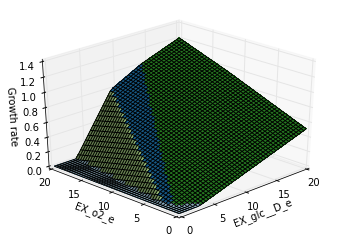

In [2]:
data = calculate_phenotype_phase_plane(model, "EX_glc__D_e", "EX_o2_e")
data.plot_matplotlib();

If [brewer2mpl](https://pypi.python.org/pypi/brewer2mpl/) is installed, other color schemes can be used as well

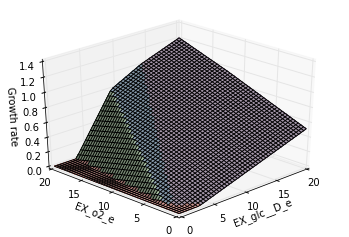

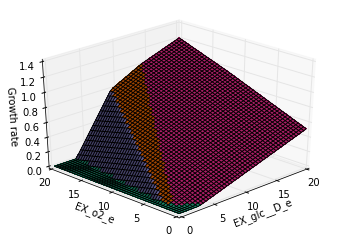

In [3]:
data.plot_matplotlib("Pastel1")
data.plot_matplotlib("Dark2");

The number of points which are plotted in each dimension can also be changed

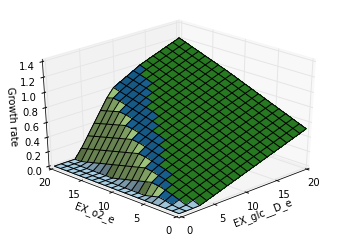

In [4]:
calculate_phenotype_phase_plane(model, "EX_glc__D_e", "EX_o2_e",
                                reaction1_npoints=20,
                                reaction2_npoints=20).plot_matplotlib();

The code can also use multiple processes to speed up calculations

In [5]:
start_time = time()
calculate_phenotype_phase_plane(model, "EX_glc__D_e", "EX_o2_e", n_processes=1,
                                reaction1_npoints=100, reaction2_npoints=100)
print("took %.2f seconds with 1 process" % (time() - start_time))
start_time = time()
calculate_phenotype_phase_plane(model, "EX_glc__D_e", "EX_o2_e", n_processes=4,
                                reaction1_npoints=100, reaction2_npoints=100)
print("took %.2f seconds with 4 process" % (time() - start_time))

took 0.40 seconds with 1 process
took 0.21 seconds with 4 process
